In [1]:
! if [ ! -e rmf_tool ]; then git clone https://github.com/ngast/rmf_tool.git; fi

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import rmf_tool.src.rmf_tool as rmf
np.random.seed(1) # to ensure reproducibility 

## Homogeneous SIS Model Setup for HomPP class

In [3]:
model = rmf.HomPP()

d = 2

S, I = 0, 1

A, B = np.zeros((d, d)), np.zeros((d, d, d, d)) 

# set unilateral transitions
A[S, I] = 1
A[I, S] = 1

# set pairwise transition rates
B[S, I, I, I] = 1

model.add_rate_tensors(A, B)
model.set_initial_state(np.array([1,0]))

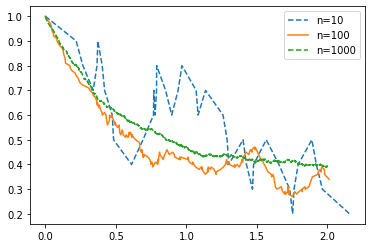

In [6]:
for n in [10, 100, 1000]:
    t,X = model.simulate(N=n, time=2)
    plt.plot(t,X[:,0], ('-' if n==100 else '--'), label='n={}'.format(n))

plt.legend()
plt.savefig('SIS.pdf', bbox_inches='tight')

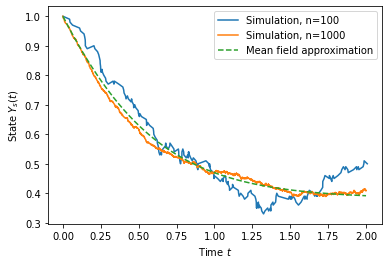

In [10]:
# plot simulations with population size n = 100, 1000 against the solution of the mean field approximation
time = 2

for n in [100, 1000]:
    t, X = model.simulate(N=n, time=time)
    plt.plot(t,X[:,0],'-', label='Simulation, n={}'.format(n))

t, X = model.ode(time=time)
plt.plot(t,X[:,0], '--', label="Mean field approximation")


plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('State $Y_s(t)$')
plt.show()